In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score , accuracy_score , classification_report , mean_absolute_error

In [2]:
df = pd.read_csv("teledata.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

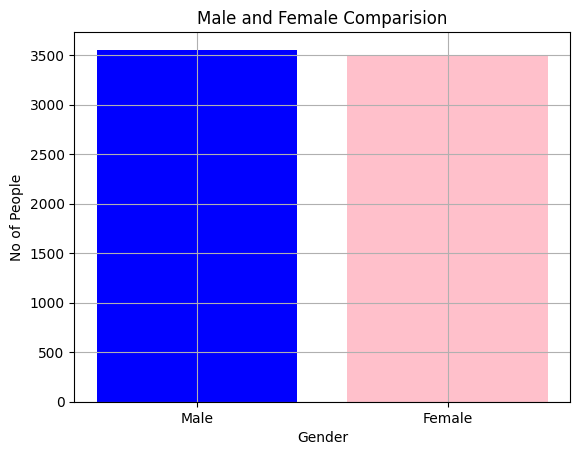

In [6]:
gender_count=df['gender'].value_counts()
plt.bar(gender_count.index , gender_count.values , color = ['Blue' , 'Pink'])
plt.xlabel('Gender')
plt.ylabel('No of People')
plt.title('Male and Female Comparision')
plt.grid()

plt.show()


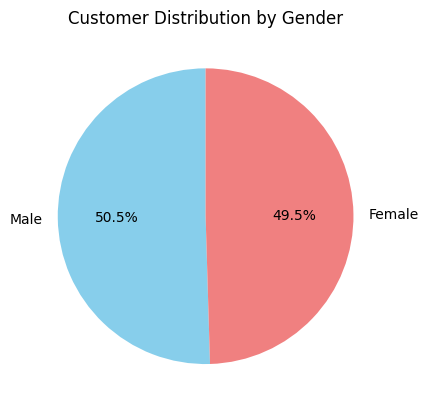

In [7]:
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, 
        labels=gender_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['skyblue', 'lightcoral'])

plt.title("Customer Distribution by Gender")
plt.show()


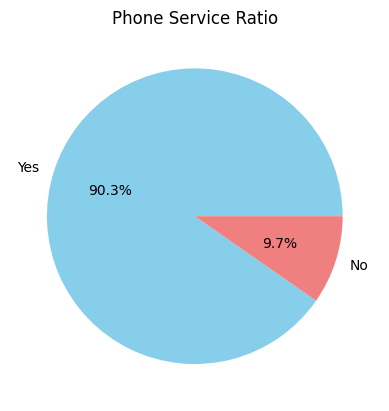

In [8]:
phone_service = df['PhoneService'].value_counts()
plt.pie(phone_service , labels = phone_service.index ,autopct='%1.1f%%' , colors=['skyblue', 'lightcoral'])
plt.title("Phone Service Ratio")
plt.show()

In [9]:
le = LabelEncoder()

In [10]:
df['Churn'] = le.fit_transform(df['Churn'])

In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


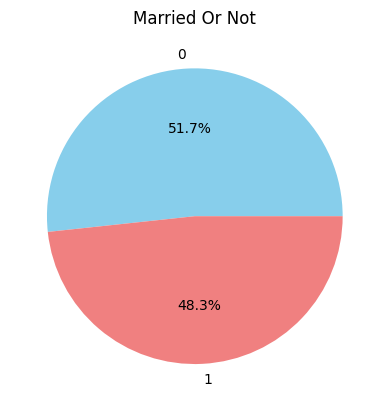

In [18]:
partner = df['Partner'].value_counts()
plt.pie(partner , labels = partner.index ,autopct='%1.1f%%' , colors=['skyblue', 'lightcoral'])
plt.title("Married Or Not")
plt.show()

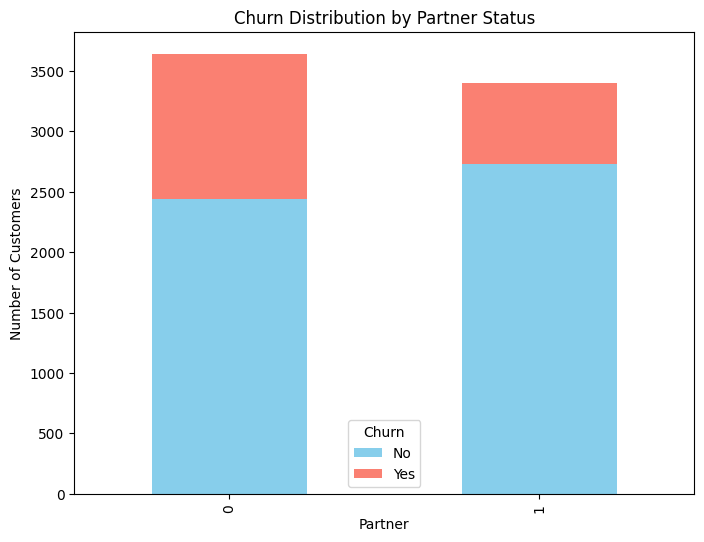

In [19]:
partner_churn = df.groupby(['Partner','Churn']).size().unstack()

partner_churn.plot(kind='bar', stacked=True, figsize=(8,6), color=['skyblue','salmon'])

plt.title("Churn Distribution by Partner Status")
plt.xlabel("Partner")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No","Yes"])
plt.show()

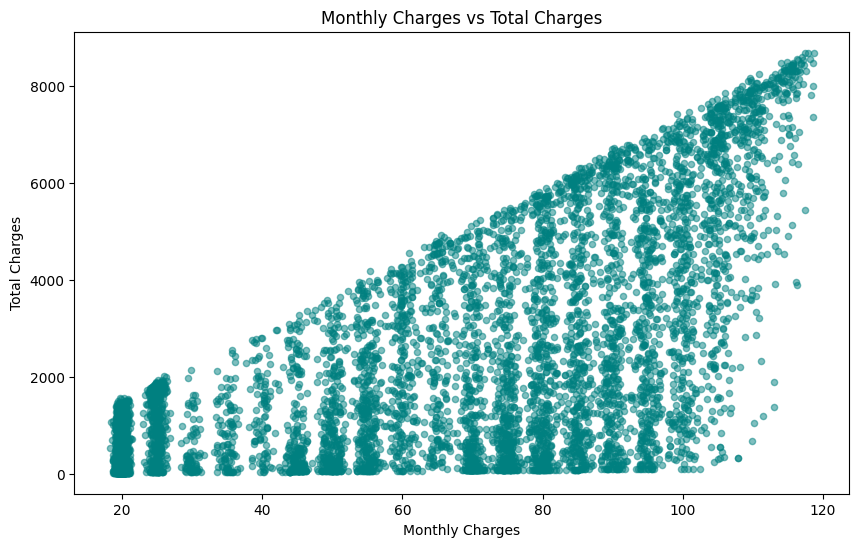

In [20]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df = df.dropna(subset=['TotalCharges'])
plt.figure(figsize=(10,6))
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], alpha=0.5, s=20, c='teal')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Monthly Charges vs Total Charges')
plt.show()


In [22]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Contract_encoder    0
dtype: int64

In [23]:
df['PhoneService'] = le.fit_transform(df['PhoneService']) 
df['Partner'] = le.fit_transform(df['Partner'])
df['gender'] = le.fit_transform(df['gender'])
df['SeniorCitizen'] = le.fit_transform(df['SeniorCitizen'])
df['Dependents'] = le.fit_transform(df['Dependents'])

categorical_cols = [
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling'
]

# Apply LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])



C:\Users\jashw\AppData\Local\Temp\ipykernel_19488\1977900755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PhoneService'] = le.fit_transform(df['PhoneService'])
C:\Users\jashw\AppData\Local\Temp\ipykernel_19488\1977900755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Partner'] = le.fit_transform(df['Partner'])
C:\Users\jashw\AppData\Local\Temp\ipykernel_19488\1977900755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [24]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_encoder
0,7590-VHVEG,0,0,1,0,1,0,No phone service,0,0,...,0,0,0,0,1,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,1,0,0,0,34,1,No,0,2,...,0,0,0,1,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,1,0,0,0,2,1,No,0,2,...,0,0,0,0,1,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,0,2,...,2,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,0,0,0,0,2,1,No,1,0,...,0,0,0,0,1,Electronic check,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,0,2,...,2,2,2,1,1,Mailed check,84.80,1990.50,0,1
7039,2234-XADUH,0,0,1,1,72,1,Yes,1,0,...,0,2,2,1,1,Credit card (automatic),103.20,7362.90,0,1
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,0,2,...,0,0,0,0,1,Electronic check,29.60,346.45,0,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,1,0,...,0,0,0,0,1,Mailed check,74.40,306.60,1,0


In [26]:
X = df[['gender' , 'SeniorCitizen' , 'Partner' , 'Dependents' , 'tenure' , 'PhoneService' , 'InternetService' , 'OnlineSecurity' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'Contract' , 'PaperlessBilling' , 'MonthlyCharges' , 'TotalCharges']]
y = df['Churn']

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [40]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [38]:
model = lr.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [39]:
print(f"Accuracy Score {accuracy_score(y_test , y_pred)}")
print(f"Classification Report {classification_report(y_test , y_pred)}")
print(f"Mean Absolute Error {mean_absolute_error(y_test , y_pred)}")
print(f"R^2 model Score {accuracy_score(y_test , y_pred)}")

Accuracy Score 0.7853589196872779
Classification Report               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Mean Absolute Error 0.2146410803127221
R^2 model Score 0.7853589196872779


In [41]:
model2 = rf.fit(X_train , y_train)
y_pred2 = model2.predict(X_test)

In [42]:
print(f"Accuracy Score {accuracy_score(y_test , y_pred2)}")
print(f"Classification Report {classification_report(y_test , y_pred2)}")
print(f"Mean Absolute Error {mean_absolute_error(y_test , y_pred2)}")
print(f"R^2 model Score {accuracy_score(y_test , y_pred2)}")

Accuracy Score 0.7775408670931059
Classification Report               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407

Mean Absolute Error 0.2224591329068941
R^2 model Score 0.7775408670931059


In [43]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]




In [44]:
model = lr.fit(X_train1 , y_train1)
y_pred = model.predict(X_test1)

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Make sure X and y have the same length
print(X.shape, y.shape)  # they must match in row count

# Stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Train Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))



(7032, 15) (7032,)
Accuracy Score: 0.7777251184834123

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.61      0.46      0.52       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110

ROC AUC: 0.8071218392868035


In [53]:
import pandas as pd


feature_names = X.columns.tolist()

def get_user_input(encoders, model, feature_names):

    gender = input("Gender (Male/Female): ")
    senior = int(input("SeniorCitizen (0 = No, 1 = Yes): "))
    partner = input("Partner (Yes/No): ")
    dependents = input("Dependents (Yes/No): ")
    tenure = int(input("Tenure (in months): "))
    phone = input("PhoneService (Yes/No): ")
    multiple = input("MultipleLines (Yes/No/No phone service): ")
    internet = input("InternetService (DSL/Fiber optic/No): ")
    online_sec = input("OnlineSecurity (Yes/No/No internet service): ")
    contract = input("Contract (Month-to-month/One year/Two year): ")
    paperless = input("PaperlessBilling (Yes/No): ")
    monthly = float(input("MonthlyCharges: "))
    total = float(input("TotalCharges: "))

  
    user_data = {
        "gender": [gender],
        "SeniorCitizen": [senior],
        "Partner": [partner],
        "Dependents": [dependents],
        "tenure": [tenure],
        "PhoneService": [phone],
        "MultipleLines": [multiple],
        "InternetService": [internet],
        "OnlineSecurity": [online_sec],
        "Contract": [contract],
        "PaperlessBilling": [paperless],
        "MonthlyCharges": [monthly],
        "TotalCharges": [total]
    }

    user_df = pd.DataFrame(user_data)

    for col, le in encoders.items():
        if col in user_df:
            user_df[col] = le.transform(user_df[col])

    user_df = user_df.reindex(columns=feature_names, fill_value=0)

    prediction = model.predict(user_df)[0]
    proba = model.predict_proba(user_df)[0][1]

    print("\nPrediction:", "Churn" if prediction == 1 else "No Churn")
    print("Churn Probability:", round(proba, 3))


In [61]:
import pickle


pickle.dump(model, open("model.pkl", "wb"))
